# 회귀분석의 간단한 예제

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 맷플롯 한글 폰트 깨짐 현상에 대한 해결 방법
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


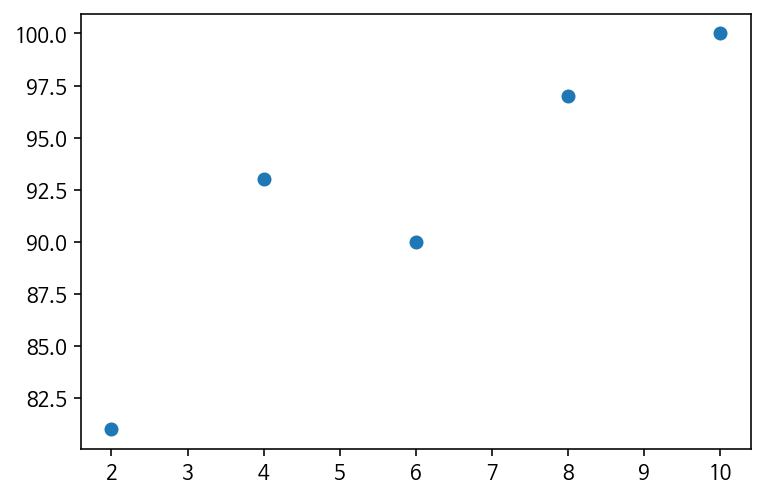

예상점수:[[94.3]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 공부시간 : 독립변수, 시험점수 : 종속변수
x = [[2],[4],[6],[8],[10]]       # 공부시간
y = [[81],[93],[90],[97],[100]]  # 시험점수

# 산점도 그래프
plt.scatter(x,y)
plt.show()

# 학습시키기
model = LinearRegression()      # 선형회귀분석 객체 생성하기

# 선형회귀분석 객체를 이용하여 학습시키기
model.fit(x,y)

# 예측하기
result = model.predict([[7]])   # 7시간 학습
print(f'예상점수:{result}')

# [날씨데이터] 회귀분석 실습

## 단순선형회귀분석

In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
seoul = pd.read_excel('/content/drive/MyDrive/(2010-2020) weather.xlsx')
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


# 새 섹션

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [ ]:
seoul.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,4018.0,4018.000000,4018.000000,4017.000000
mean,108.0,12.965207,8.991015,17.699627
std,0.0,10.803691,10.932678,10.976719
min,108.0,-14.800000,-18.000000,-10.700000
25%,108.0,3.700000,-0.300000,8.200000
50%,108.0,14.250000,9.800000,19.600000
75%,108.0,22.800000,18.900000,27.400000
max,108.0,33.700000,30.300000,39.600000


In [ ]:
# 지점명 컬럼 삭제
seoul.drop('지점',axis=1,inplace=True)
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [ ]:
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [ ]:
# 컬럼명 변경
seoul.columns=['날짜','평균기온','최저기온','최고기온']
seoul.columns

Index(['날짜', '평균기온', '최저기온', '최고기온'], dtype='object')

In [ ]:
seoul.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [ ]:
# 누락 데이터 행을 삭제하기
seoul.dropna(subset=['최고기온'],axis=0,inplace=True)

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 156.9 KB


In [ ]:
# 컬럼추가
seoul['년도']=seoul['날짜'].dt.year
#seoul['월']=seoul['날짜'].dt.month
#seoul['일']=seoul['날짜'].dt.day
seoul.head()

,날짜,평균기온,최저기온,최고기온,년도
0,2010-01-01,-7.6,-12.7,-3.6,2010
1,2010-01-02,-3.6,-7.4,0.2,2010
2,2010-01-03,-6.8,-10.5,-3.2,2010
3,2010-01-04,-5.9,-8.0,-3.4,2010
4,2010-01-05,-9.9,-12.3,-7.0,2010


In [ ]:
# 데이터분석에 사용할 데이터 필터링
conditions=(seoul['날짜'].dt.month==8) & (seoul['날짜'].dt.day==15)
conditions
seoul0815=seoul[conditions]
seoul0815

,날짜,평균기온,최저기온,최고기온,년도
226,2010-08-15,26.6,24.6,30.2,2010
591,2011-08-15,24.5,22.9,26.9,2011
957,2012-08-15,23.7,22.4,27.1,2012
1322,2013-08-15,28.7,25.8,32.4,2013
1687,2014-08-15,24.9,20.9,29.6,2014
2052,2015-08-15,27.1,23.1,30.8,2015
2418,2016-08-15,29.1,25.8,34.0,2016
2783,2017-08-15,21.9,20.8,24.0,2017
3148,2018-08-15,31.7,28.3,38.0,2018
3513,2019-08-15,25.9,23.9,28.6,2019


In [ ]:
seoul0815.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 226 to 3879
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11 non-null     datetime64[ns]
 1   평균기온    11 non-null     float64       
 2   최저기온    11 non-null     float64       
 3   최고기온    11 non-null     float64       
 4   년도      11 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 528.0 bytes


In [ ]:
# 결측값 처리
seoul0815.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    0
년도      0
dtype: int64

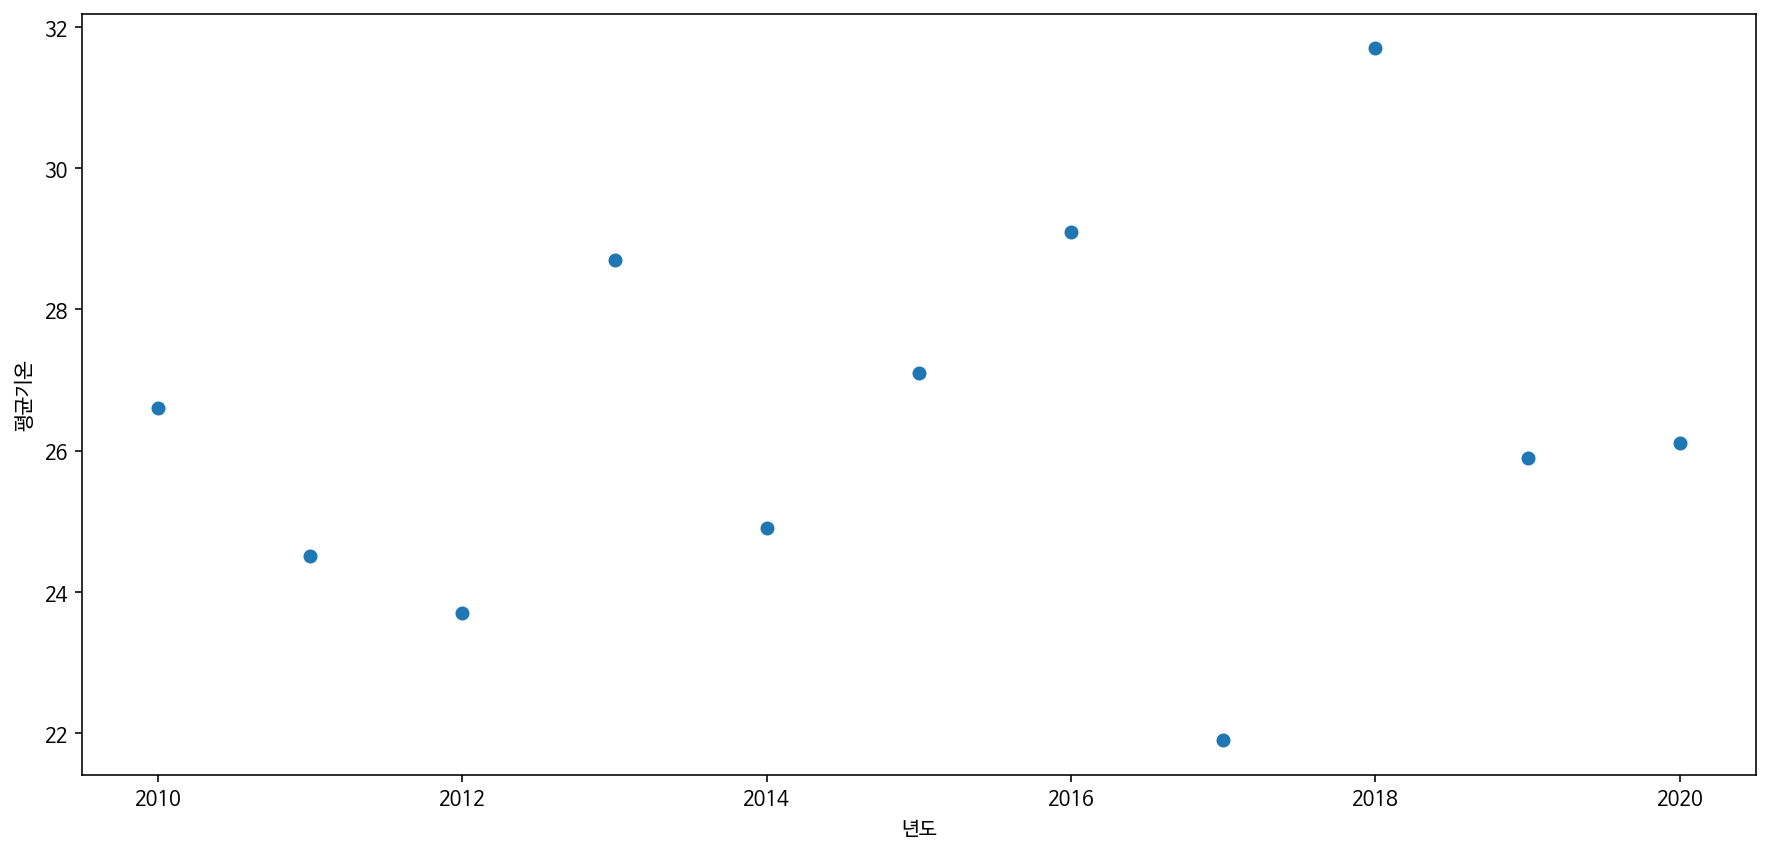

In [ ]:
# 년도, 평균기온 산점도 그리기
fig = plt.figure(figsize=(15,7))
X = seoul0815[['년도']]
Y = seoul0815['평균기온']
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.scatter(X,Y)
plt.show()

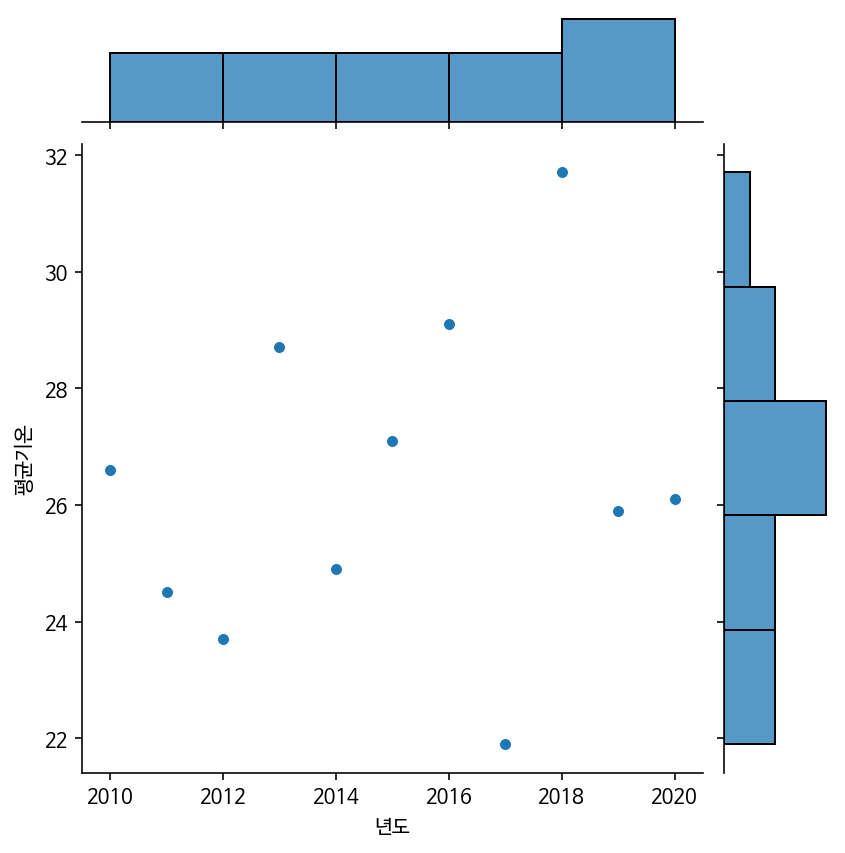

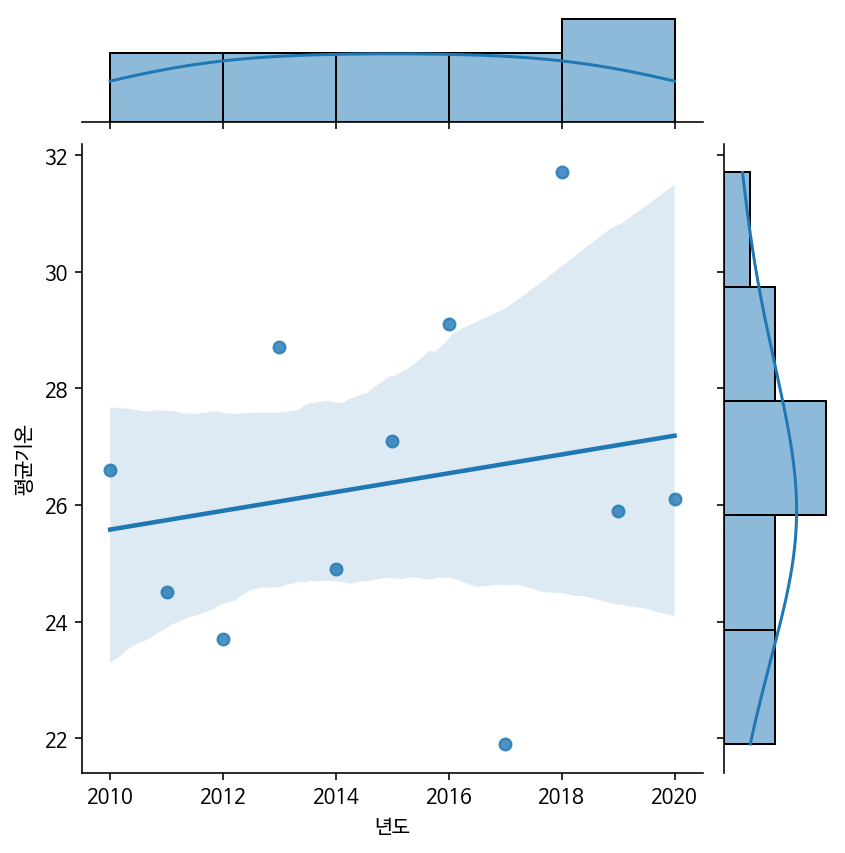

In [ ]:
# jointplot 그리기
sns.jointplot(x='년도', y ='평균기온', data=seoul0815)
sns.jointplot(x='년도', y ='평균기온', kind='reg',data=seoul0815)
plt.show()

In [ ]:
# 단순선형회귀분석 : 2022년 08월15일 기온예측하기
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
X = seoul0815[['년도']]
Y = seoul0815['평균기온']
model.fit(X, Y) #  LinearRegression 모델을 생성하고, 그 안에 X, y 데이터를 fit 시킨다
result = model.predict([['2022']]) # [27.50818182] 예측된 값
print(result)   

[27.50818182]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [ ]:
# 파이썬 머신러닝 라이브러리 싸이킷런 불러오기
'''
fit() 메서드는 선형 회귀 모델에 필요한 두 가지 변수를 전달하는 거다.
기울기: line_fitter.coef_
절편: line_fitter.intercept_
이렇게 하면 새로운 X 값을 넣어 y값을 예측할 수 있게 된다.
싸이킷런 단순 선형회귀에서는 최소제곱법(Ordinary Least Squares)을 활용하기 때문이다.
'''

'\nfit() 메서드는 선형 회귀 모델에 필요한 두 가지 변수를 전달하는 거다.\n기울기: line_fitter.coef_\n절편: line_fitter.intercept_\n이렇게 하면 새로운 X 값을 넣어 y값을 예측할 수 있게 된다.\n싸이킷런 단순 선형회귀에서는 최소제곱법(Ordinary Least Squares)을 활용하기 때문이다.\n'

In [ ]:
seoul0815.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 226 to 3879
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11 non-null     datetime64[ns]
 1   평균기온    11 non-null     float64       
 2   최저기온    11 non-null     float64       
 3   최고기온    11 non-null     float64       
 4   년도      11 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 828.0 bytes


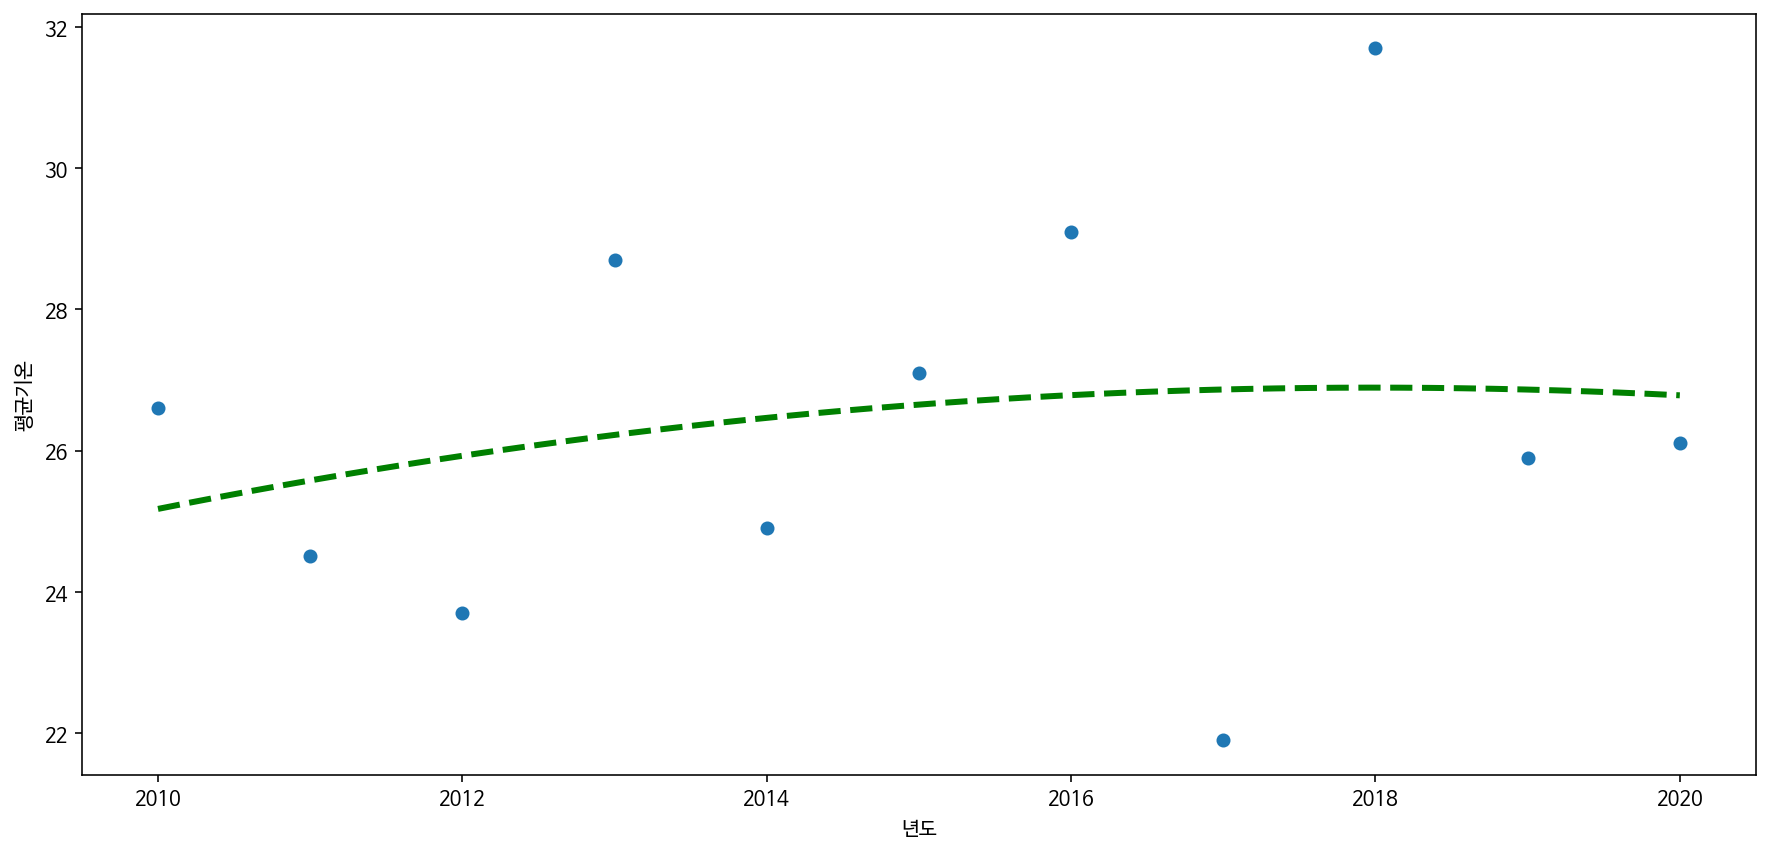

In [ ]:
# 08월15일 평균기온을 산점도, 회귀선 출력하기
x=seoul0815['년도']
y=seoul0815['평균기온']

fp1 = np.polyfit(x, y,2)
f1 = np.poly1d(fp1)
fx = np.linspace(2010, 2020)

plt.figure(figsize=(15,7))
plt.scatter(x,y)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') # 직선의 모양(dashed)은 점선이고 선의 두께는 3, 선 색깔은 'green'으로 설정

plt.xlabel('년도')
plt.ylabel('평균기온')
plt.show()

In [ ]:
fp1
f1
fx

array([2010.        , 2010.20408163, 2010.40816327, 2010.6122449 ,
       2010.81632653, 2011.02040816, 2011.2244898 , 2011.42857143,
       2011.63265306, 2011.83673469, 2012.04081633, 2012.24489796,
       2012.44897959, 2012.65306122, 2012.85714286, 2013.06122449,
       2013.26530612, 2013.46938776, 2013.67346939, 2013.87755102,
       2014.08163265, 2014.28571429, 2014.48979592, 2014.69387755,
       2014.89795918, 2015.10204082, 2015.30612245, 2015.51020408,
       2015.71428571, 2015.91836735, 2016.12244898, 2016.32653061,
       2016.53061224, 2016.73469388, 2016.93877551, 2017.14285714,
       2017.34693878, 2017.55102041, 2017.75510204, 2017.95918367,
       2018.16326531, 2018.36734694, 2018.57142857, 2018.7755102 ,
       2018.97959184, 2019.18367347, 2019.3877551 , 2019.59183673,
       2019.79591837, 2020.        ])

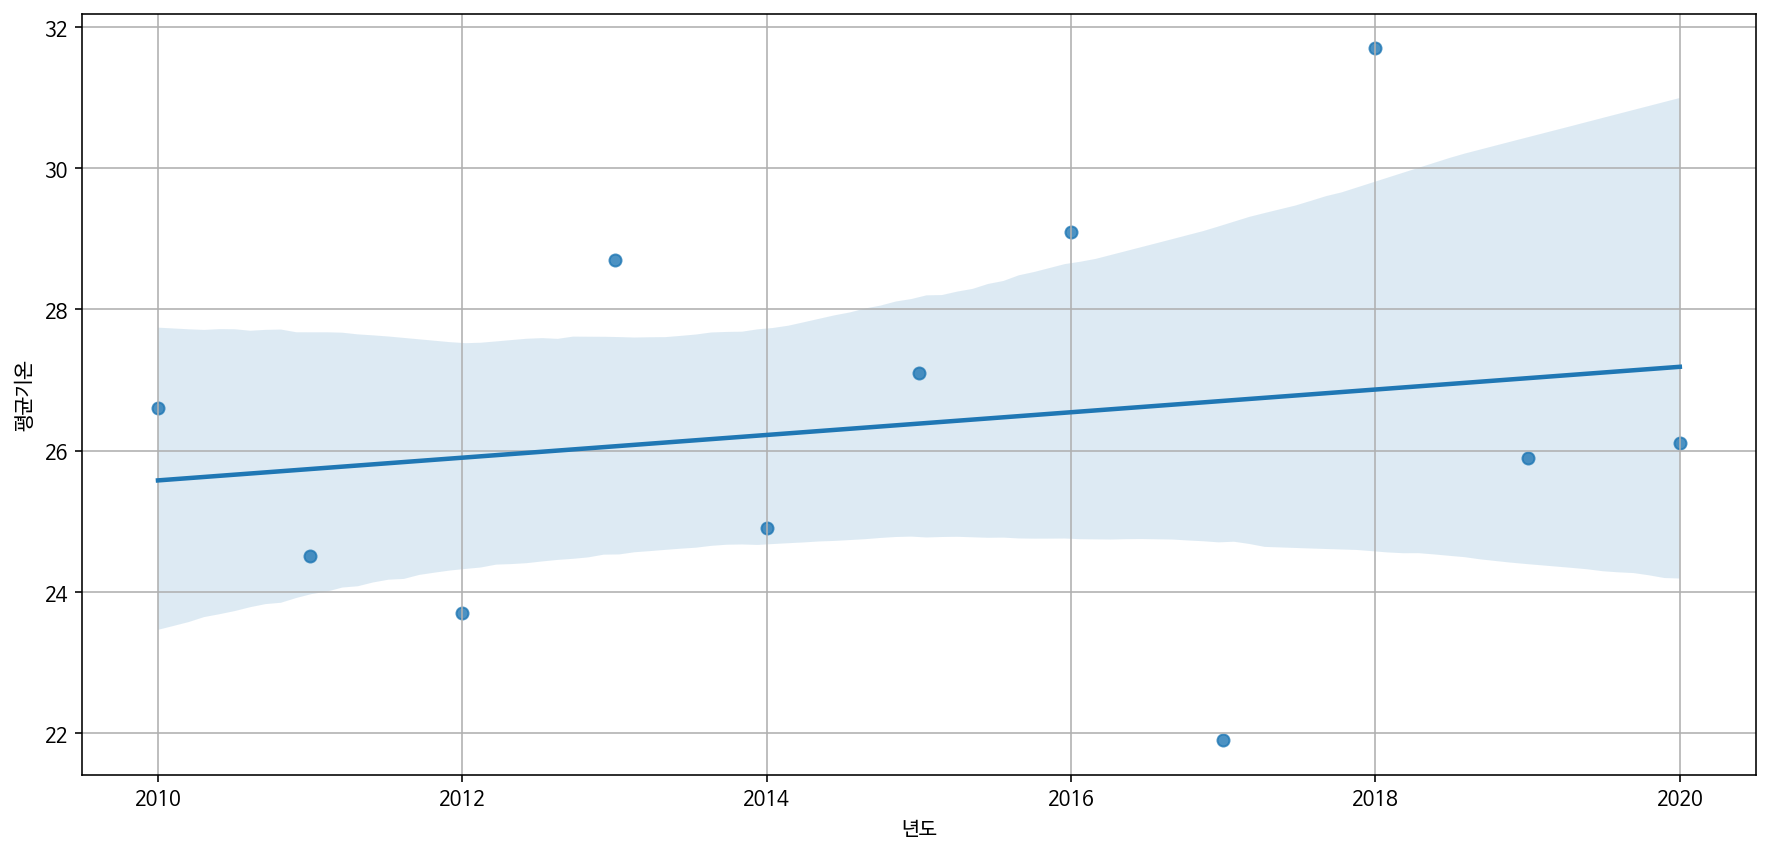

In [ ]:
# 시본 모듈로 추세선 넣기
fig = plt.figure(figsize=(15, 7))   
sns.regplot(x='년도', y='평균기온', data=seoul0815) 
plt.grid()
plt.show()

<Figure size 1080x504 with 0 Axes>

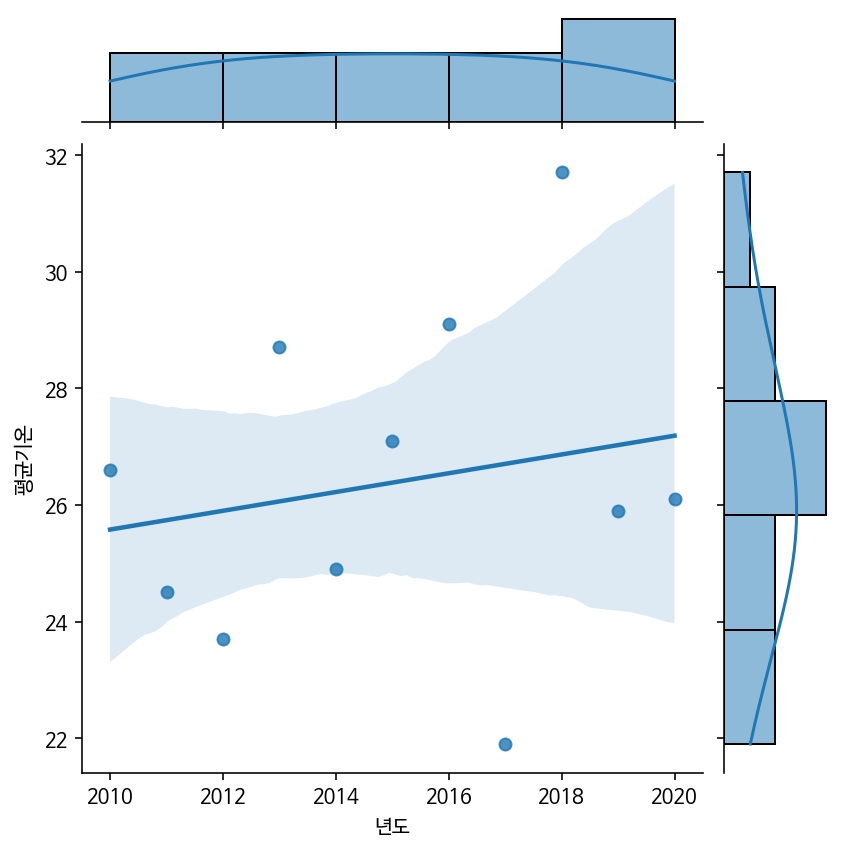

In [ ]:
plt.figure(figsize=(15, 7)) 
sns.jointplot(x='년도', y='평균기온', data=seoul0815, kind='reg')
plt.show()

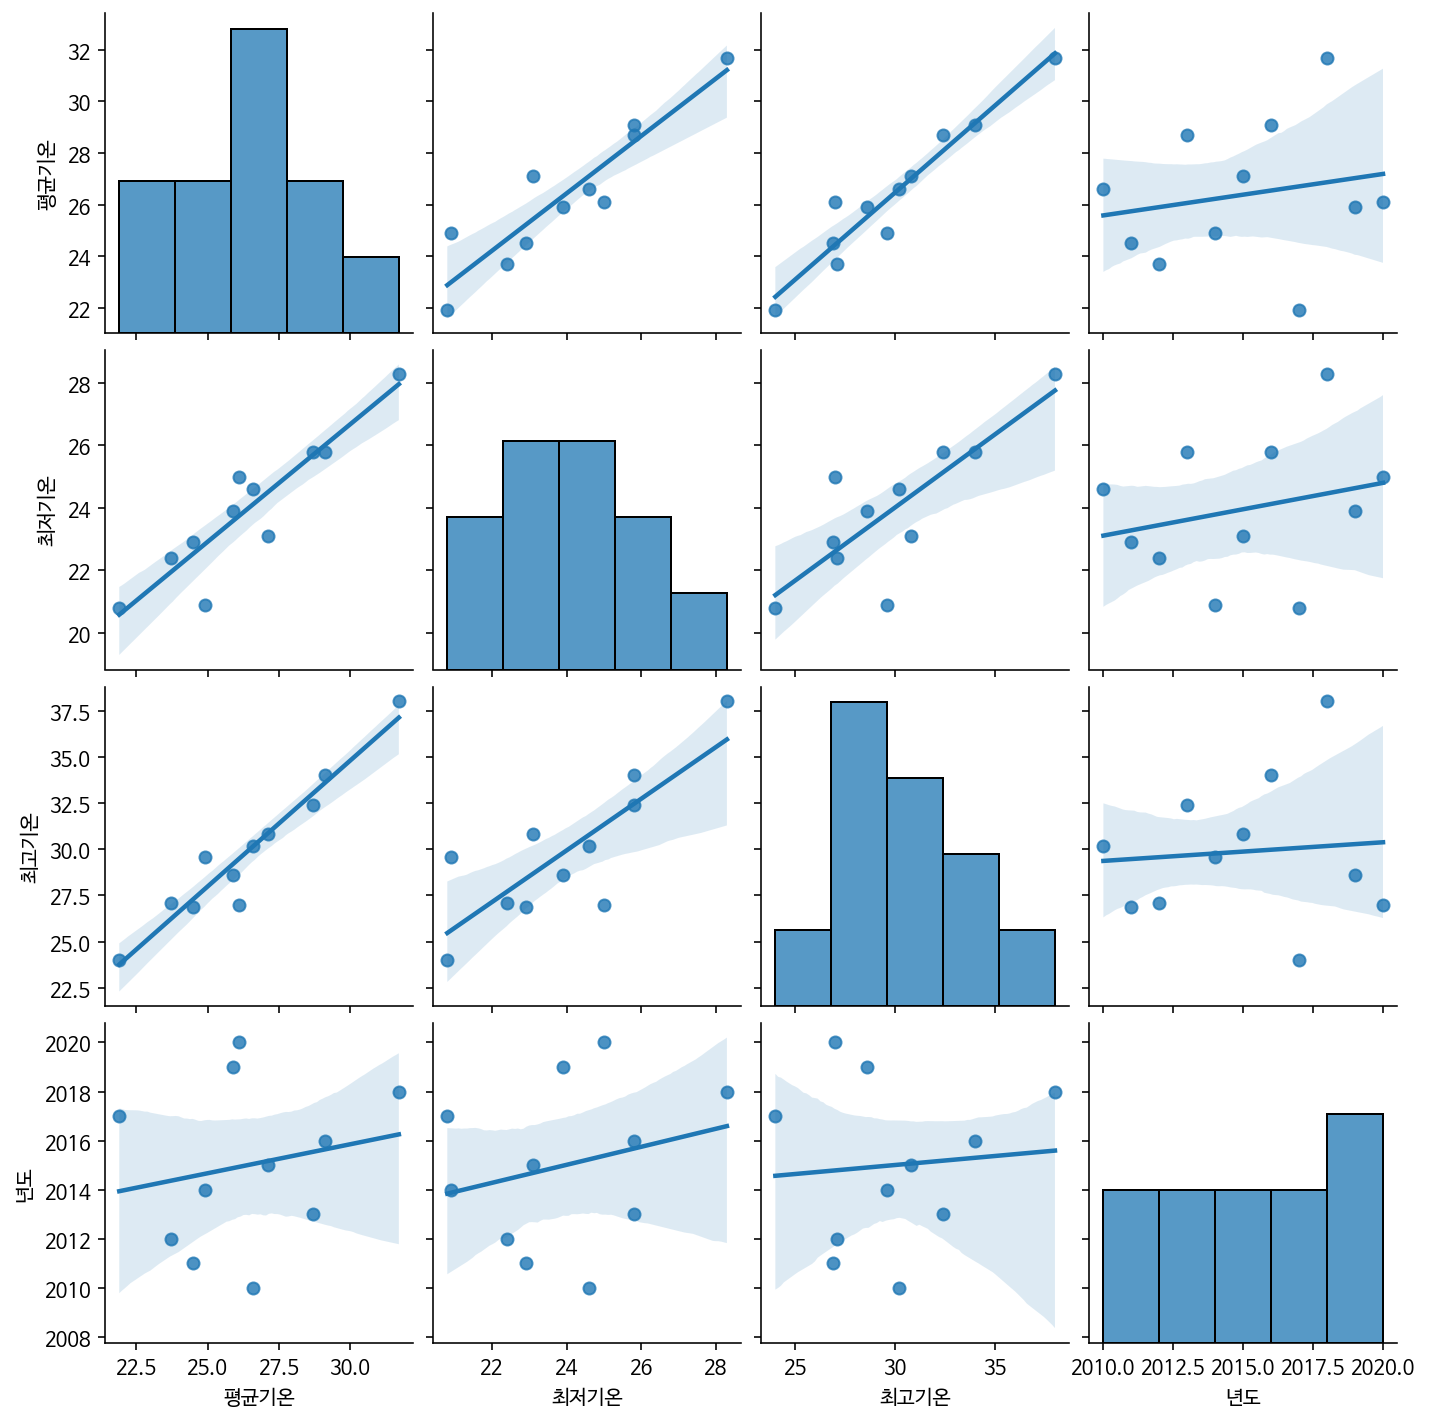

In [ ]:
sns.pairplot(seoul0815,kind='reg')
plt.show()

## 다중회귀분석

In [ ]:
seoul.info()
seoul.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
 4   년도      4017 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 188.3 KB


,날짜,평균기온,최저기온,최고기온,년도
0,2010-01-01,-7.6,-12.7,-3.6,2010
1,2010-01-02,-3.6,-7.4,0.2,2010
2,2010-01-03,-6.8,-10.5,-3.2,2010
3,2010-01-04,-5.9,-8.0,-3.4,2010
4,2010-01-05,-9.9,-12.3,-7.0,2010


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = seoul0815[['년도','최저기온','최고기온']]
Y = seoul0815['평균기온']

model.fit(X, Y)
result = model.predict([['2022',24,33]]) # 2022년,최저기온,최고기온
print(result)                # [28.08381871] # 평균기온 예측됨

[28.08381871]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


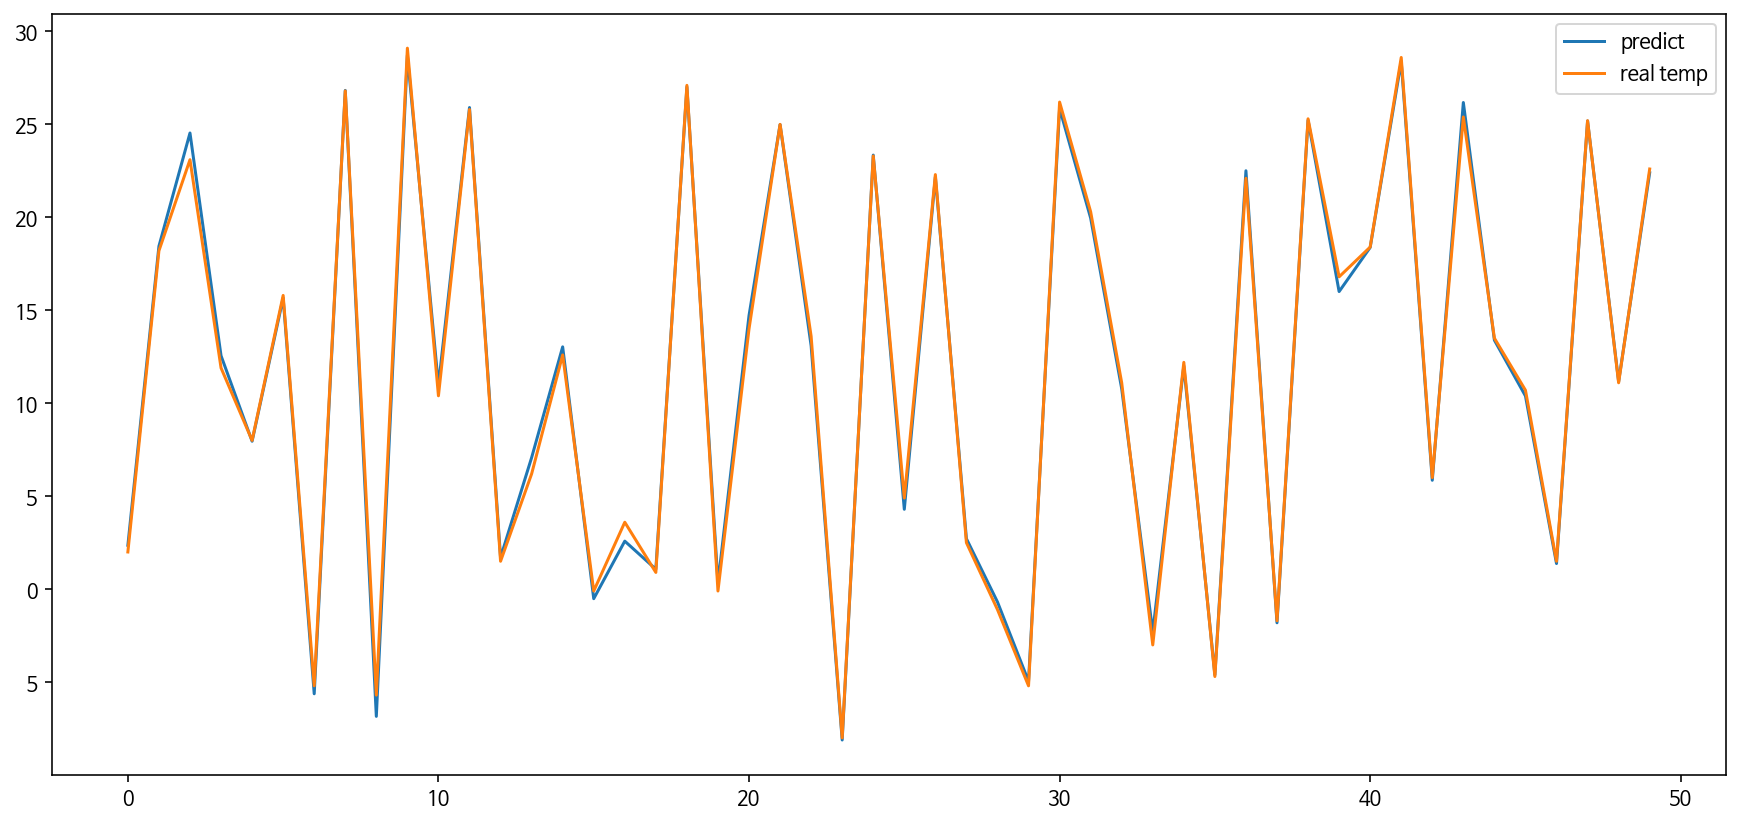

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.figure(figsize=(15,7))


# 데이터 준비 : 속성(변수) 2가지 선택
X = seoul[['년도','최저기온','최고기온']]
Y = seoul['평균기온']

# 먼저 X와 Y변수를 받아 사이킷런의 train_test_split함수를 통해 7:3의 비율로 데이터를 분할한다.
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3)

#다중 선형 회귀 모델 생성
model = LinearRegression()
model.fit(x_train, y_train)

# 모델 테스트하기 : test셋의 일부 데이터를 가지고 모델의 예측결과가 얼마나 좋게 나타나는지 확인
plt.plot(model.predict(x_test[:50]), label='predict')
plt.plot(y_test[:50].values.reshape(-1, 1), label='real temp')
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


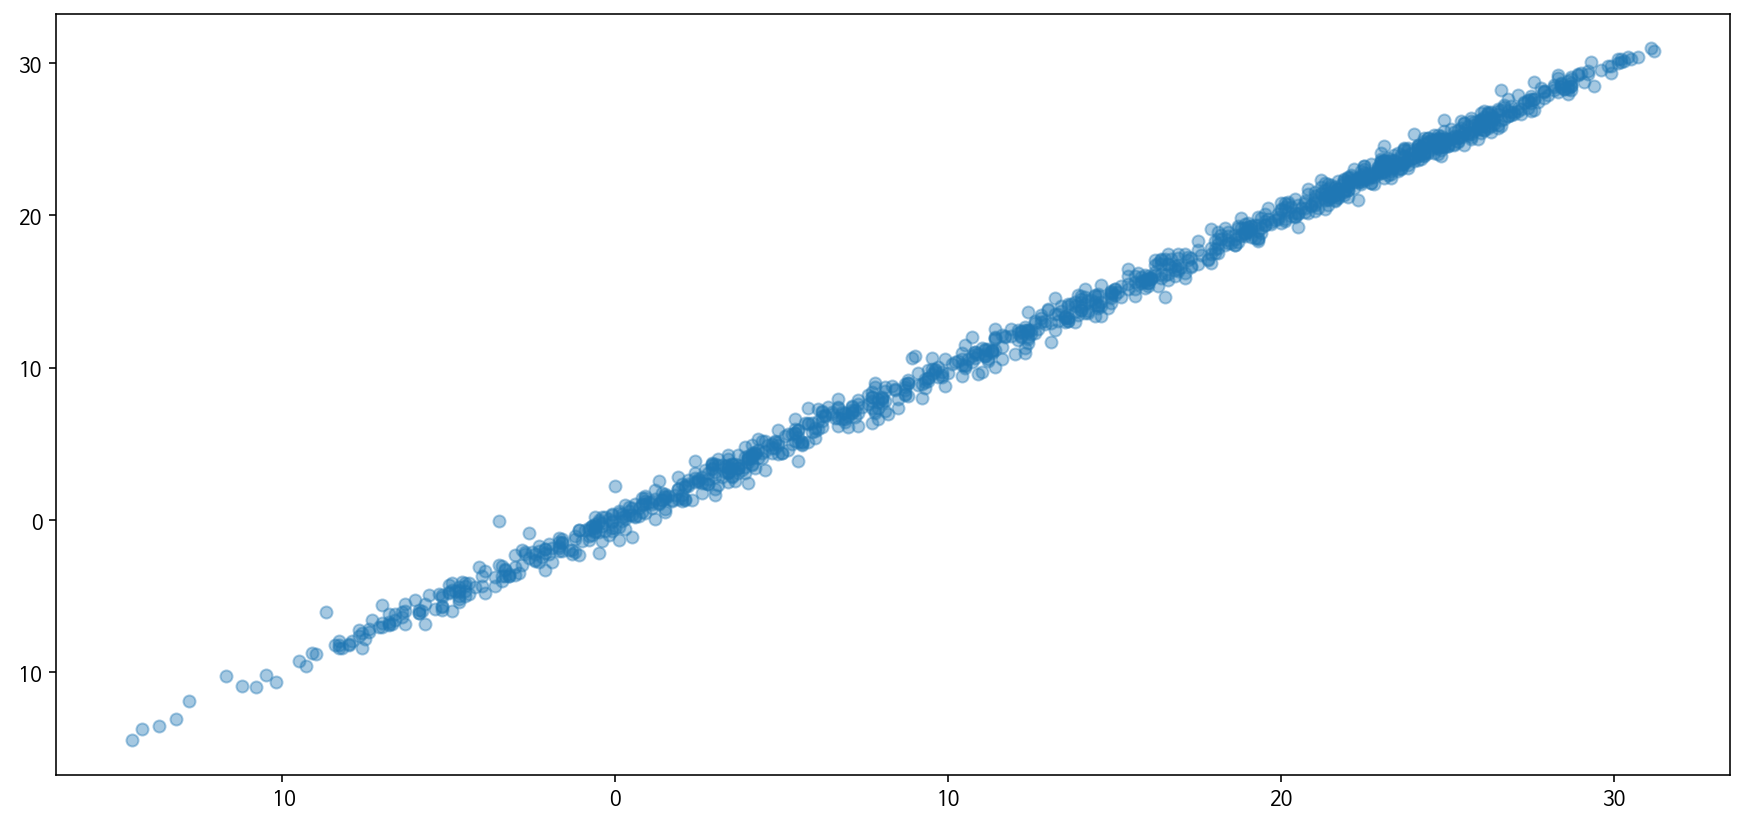

In [ ]:
# 전체 데이터를 이용해 값을 예측하고 실제 값과 비교하여 산점도 그리기
plt.figure(figsize=(15,7))
y_predict = model.predict(x_test)

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [ ]:
# score 메소드를 통해 다중선형회귀 모델의 성능을 측정
print(model.score(x_train,y_train))
# 결정계수 R²의 최댓값은 1이며 이 수치가 클수록 실제값과 예측값이 유사함을 의미한다.
'''
우리가 모델링한 다중선형회귀모델은 약 0.99의 결정계수를 가지며 
이는 X변수들이 y변수에 미치는 영향이 99%로 X변수들이 평균기온값 변동의 99%를 설명할 수 있다는 뜻이다.
''''

0.9976977104781903
